# Complex models are costly: evidence from the mtcars dataset

## Introduction

Complex economic models are costly to evaluate, and maintain. This is especially true for, for example, AI-models with a complex structure and many features. In this project we will show that this is not only true for economic models, but also has a real world implication in the market for car milages.

Using the `mtcars`-dataset, we will analyze the impact of transmission, cylinder count and horsepower on the liters per kilometers.

Imports and set magics:

In [77]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
from mtcars import mtcars
from dataproject import plot


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

The `data` comes precleaned but are missing some basics.

Import your data, either through an API or manually, and load it. 

## Descriptive Analysis

In this section we will explore how `hp` correlates with `kml`, and examine the interaction effect with `am` and `cyl`.

### Horsepower and Kilometers per liter

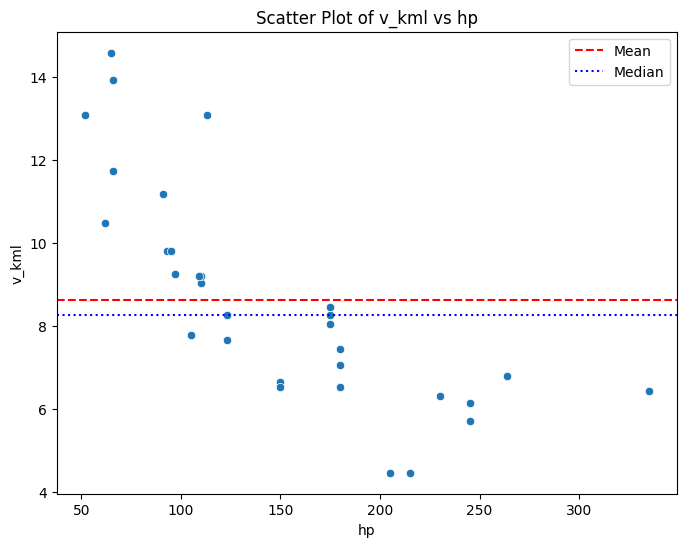

In [78]:
plot(
    data = mtcars,
    x = "hp",
    y = "v_kml"
)

There is a negative relationship between `hp` and `kml`. The distribution of `kml` is slightly skewed, but not enough to warrant a `standardization`.

### 

### Horsepower vs Kilometers per Liter grouped by number of cylinders

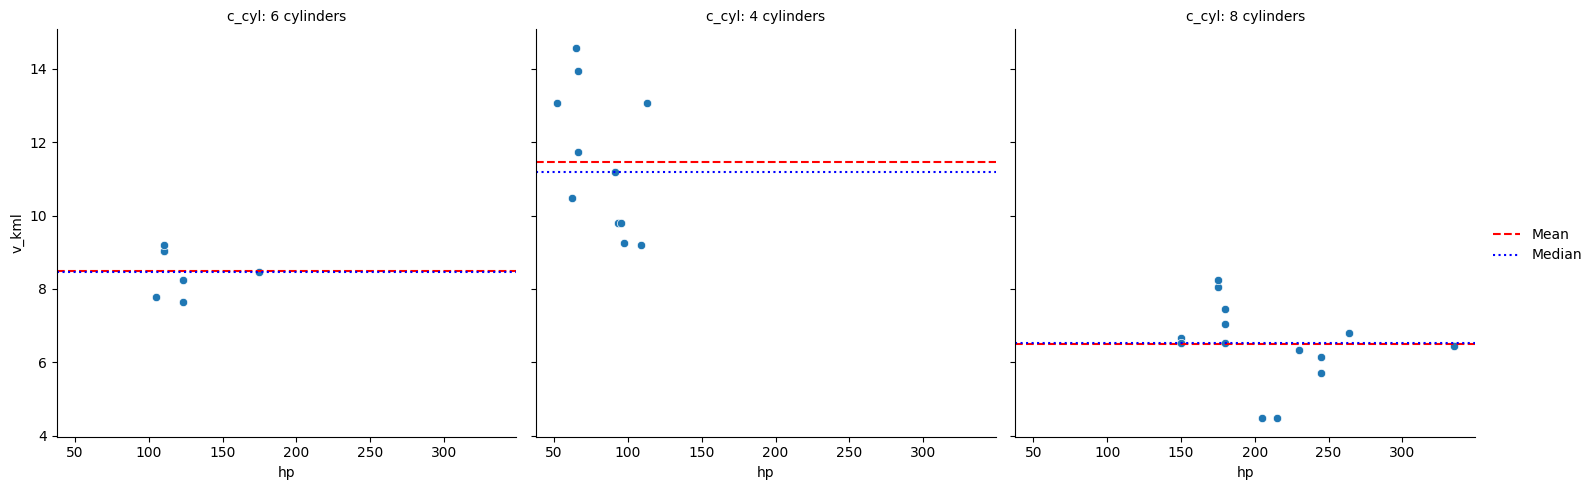

In [79]:
plot(
    data = mtcars,
    x    = "hp",
    y    = "v_kml",
    by   = "c_cyl"
)

Cars with higher number of cylinders have a lower `kml`. The grouped statistics are less skewed as indicated by the narrow gap between the `mean` and `median`.

### Horsepower vs Kilometers per Liter grouped by Transmission

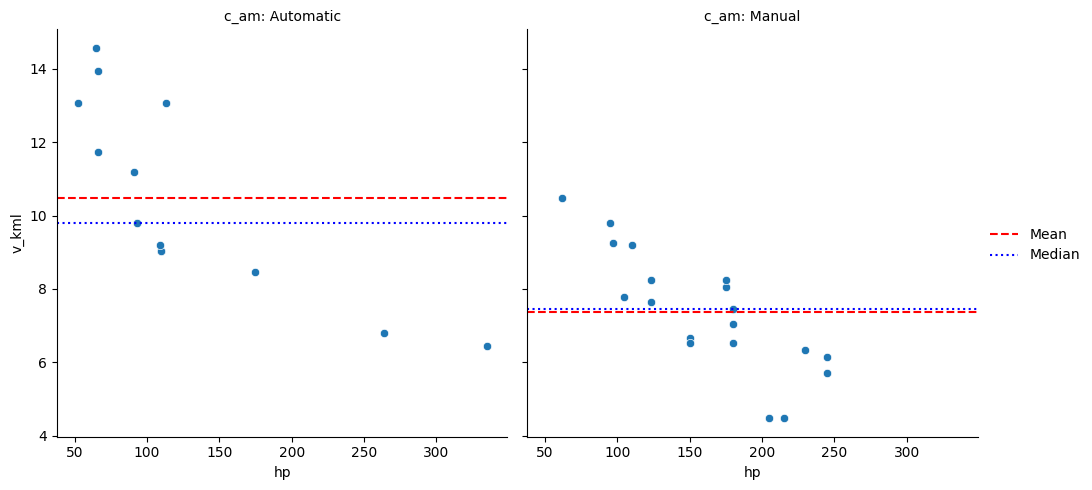

In [80]:
plot(
    data = mtcars,
    x    = "hp",
    y    = "v_kml",
    by   = "c_am"
)

On average cars with `automatic` transmissions have a higher `kml` which is an unexpected statistic, as one would expect the converse to be true assuming that complex cars would be more costly. However, this difference could be attributed to the notion that cars with `automatic` transmissions are more modern and are, therefore, more cost-efficient on average.

## Inferential Analysis

In this section we will run 2 regressions. A simple regression, and a regression with interaction effects on cylinder count and transmission type.

### Data preperation

The data preperation for the regression analysis are done in the `notebook` for transparency. Each preperation step is described in each codeblock.

In [81]:
# Convert cyl to dummy
# variable.
dummies = pd.get_dummies(mtcars["cyl"], prefix="cyl")
mtcars  = pd.concat([mtcars, dummies], axis= 1)

## Simple OLS

In [82]:
model = smf.ols('v_kml ~ hp', data=mtcars).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  v_kml   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.79e-07
Time:                        18:06:47   Log-Likelihood:                -60.612
No. Observations:                  32   AIC:                             125.2
Df Residuals:                      30   BIC:                             128.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9425      0.703     18.421      0.0

In [83]:
model = smf.ols('v_kml ~ hp + cyl_6 + cyl_8 + hp:cyl_6 + hp:cyl_8', data=mtcars).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  v_kml   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     19.35
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           5.02e-08
Time:                        18:06:47   Log-Likelihood:                -50.535
No. Observations:                  32   AIC:                             113.1
Df Residuals:                      26   BIC:                             121.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.4727      1.672  